In [1]:
import pandas as pd
import glob, os
import numpy as np
import datetime as dt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

beat_crime/   Crime_years_merge.ipynb*  Untitled.ipynb*
crime_clean/  sports_clean/


In [3]:
ls crime_clean/

beat_10H10.csv*  beat_10H70.csv*     crime11_clean.csv*  crime16_clean.csv*
beat_10H30.csv*  beat_10H80.csv*     crime12_clean.csv*  crime17_clean.csv*
beat_10H40.csv*  beat_15E40.csv*     crime13_clean.csv*
beat_10H50.csv*  beat_1A10.csv*      crime14_clean.csv*
beat_10H60.csv*  crime10_clean.csv*  crime15_clean.csv*


In [4]:
path = 'crime_clean/'

In [5]:
all_files = glob.glob(os.path.join(path, "*.csv")) 

df_from_each_file = (pd.read_csv(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [6]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date').sort_index(ascending=True)

In [7]:
df.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1914-09-08,24C60,12700-12799,lake houston,Burglary,restaurant or cafeteria,1.0,7.0,8,Tuesday,Sep,1914
1914-11-02,18F60,8800-8899,bellaire,Burglary,miscellaneous business (non-specific),1.0,3.0,2,Monday,Nov,1914
1914-12-03,12D20,12800-12899,gulf,Auto Theft,none,1.0,19.0,3,Thursday,Dec,1914
1915-01-05,3B10,3200-3299,mangum rd 180,Theft,other parking lot,1.0,22.0,5,Tuesday,Jan,1915
1915-01-14,5F10,7000-7099,westview,Auto Theft,apartment parking lot,1.0,23.0,14,Thursday,Jan,1915


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1075199 entries, 1914-09-08 to 2033-04-21
Data columns (total 11 columns):
Beat           1075199 non-null object
BlockRange     1075199 non-null object
StreetName     1075192 non-null object
OffenseType    1075199 non-null object
Premise        1075199 non-null object
NumOffenses    1075199 non-null float64
Hour           1075199 non-null float64
day            1075199 non-null object
weekday        1075199 non-null object
month          1075199 non-null object
year           1075199 non-null object
dtypes: float64(2), object(9)
memory usage: 98.4+ MB


## Check for null values

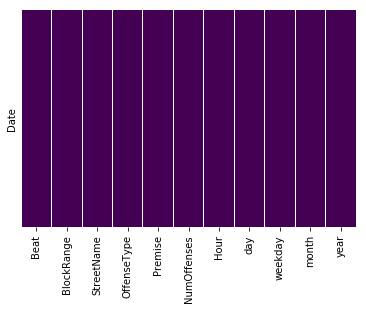

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.apply(lambda x: sum(x.isnull()))

Beat           0
BlockRange     0
StreetName     7
OffenseType    0
Premise        0
NumOffenses    0
Hour           0
day            0
weekday        0
month          0
year           0
dtype: int64

## year column

In [11]:
df.year.unique()

array([1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1924, 1926, 1927,
       1953, 1959, 1963, 1964, 1965, 1966, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2019, 2020, 2021, 2029, 2033], dtype=object)

## Slice year from 2010 - 2017

In [12]:
df = df['1/1/2010':'12/31/2017']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1072618 entries, 2010-01-01 to 2017-12-31
Data columns (total 11 columns):
Beat           1072618 non-null object
BlockRange     1072618 non-null object
StreetName     1072611 non-null object
OffenseType    1072618 non-null object
Premise        1072618 non-null object
NumOffenses    1072618 non-null float64
Hour           1072618 non-null float64
day            1072618 non-null object
weekday        1072618 non-null object
month          1072618 non-null object
year           1072618 non-null object
dtypes: float64(2), object(9)
memory usage: 98.2+ MB


In [14]:
print(df.head())

             Beat   BlockRange   StreetName         OffenseType  \
Date                                                              
2010-01-01   5F30  13200-13299    northwest               Theft   
2010-01-01  20G10    9900-9999     richmond               Theft   
2010-01-01  14D20    8500-8599        rubin  Aggravated Assault   
2010-01-01  14D40    4200-4299  friar point            Burglary   
2010-01-01  10H70    4800-4899       austin            Burglary   

                              Premise  NumOffenses  Hour day weekday month  \
Date                                                                         
2010-01-01  department/discount store          1.0  22.0   1  Friday   Jan   
2010-01-01      apartment parking lot          1.0  16.0   1  Friday   Jan   
2010-01-01       road/street/sidewalk          1.0   7.0   1  Friday   Jan   
2010-01-01            residence/house          1.0  20.0   1  Friday   Jan   
2010-01-01            residence/house          1.0  21.0   1  

In [15]:
df.apply(lambda x: sum(x.isnull()))

Beat           0
BlockRange     0
StreetName     7
OffenseType    0
Premise        0
NumOffenses    0
Hour           0
day            0
weekday        0
month          0
year           0
dtype: int64

In [16]:
df.dtypes

Beat            object
BlockRange      object
StreetName      object
OffenseType     object
Premise         object
NumOffenses    float64
Hour           float64
day             object
weekday         object
month           object
year            object
dtype: object

## Select Beats

- 10H10
- 10H30
- 10H40
- 10H50
- 10H60
- 10H70
- 10H80
- 15E40
- 1A10

In [17]:
beats = ['10H10','10H30', '10H40', '10H50', '10H60','10H70', '10H80', '15E40', '1A10']

In [18]:
df.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2010-01-01,5F30,13200-13299,northwest,Theft,department/discount store,1.0,22.0,1,Friday,Jan,2010
2010-01-01,20G10,9900-9999,richmond,Theft,apartment parking lot,1.0,16.0,1,Friday,Jan,2010
2010-01-01,14D20,8500-8599,rubin,Aggravated Assault,road/street/sidewalk,1.0,7.0,1,Friday,Jan,2010
2010-01-01,14D40,4200-4299,friar point,Burglary,residence/house,1.0,20.0,1,Friday,Jan,2010
2010-01-01,10H70,4800-4899,austin,Burglary,residence/house,1.0,21.0,1,Friday,Jan,2010


In [19]:
df.Beat.value_counts(dropna=False)[:10]

1A10     30650
10H70    22846
19G10    21422
12D10    21242
1A20     20938
10H40    20920
6B60     20067
13D20    19135
3B10     18199
18F20    17541
Name: Beat, dtype: int64

In [20]:
selected_beats = df.Beat.isin(beats)

In [21]:
selected_beats.head()

Date
2010-01-01    False
2010-01-01    False
2010-01-01    False
2010-01-01    False
2010-01-01     True
Name: Beat, dtype: bool

## Split selected beats and save 

In [22]:
df = df[selected_beats]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 154132 entries, 2010-01-01 to 2017-12-31
Data columns (total 11 columns):
Beat           154132 non-null object
BlockRange     154132 non-null object
StreetName     154132 non-null object
OffenseType    154132 non-null object
Premise        154132 non-null object
NumOffenses    154132 non-null float64
Hour           154132 non-null float64
day            154132 non-null object
weekday        154132 non-null object
month          154132 non-null object
year           154132 non-null object
dtypes: float64(2), object(9)
memory usage: 14.1+ MB


In [25]:
df.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2010-01-01,10H70,4800-4899,austin,Burglary,residence/house,1.0,21.0,1,Friday,Jan,2010
2010-01-01,10H50,3100-3199,ennis,Aggravated Assault,road/street/sidewalk,1.0,18.0,1,Friday,Jan,2010
2010-01-01,1A10,400-499,caroline,Theft,road/street/sidewalk,1.0,2.0,1,Friday,Jan,2010
2010-01-01,10H70,6500-6599,fannin,Aggravated Assault,hospital,1.0,19.0,1,Friday,Jan,2010
2010-01-01,10H60,4000-4099,canfield,Robbery,bank/saving institution parking lot,1.0,4.0,1,Friday,Jan,2010


## Cleanup Hour col

In [26]:
df.Hour.value_counts()

12.0    8505
18.0    8419
17.0    8419
15.0    8094
16.0    7949
0.0     7910
10.0    7748
14.0    7670
11.0    7565
22.0    7563
9.0     7560
19.0    7508
8.0     7218
13.0    7217
20.0    7148
21.0    6859
23.0    6680
7.0     5272
1.0     4450
2.0     4250
6.0     3295
3.0     2841
5.0     2002
4.0     1988
24.0       2
Name: Hour, dtype: int64

In [27]:
df.Hour = df.Hour.astype('int')

In [28]:
df.Hour.value_counts()

12    8505
18    8419
17    8419
15    8094
16    7949
0     7910
10    7748
14    7670
11    7565
22    7563
9     7560
19    7508
8     7218
13    7217
20    7148
21    6859
23    6680
7     5272
1     4450
2     4250
6     3295
3     2841
5     2002
4     1988
24       2
Name: Hour, dtype: int64

In [29]:
## change 24 to 0 value
df.Hour.replace(24,0,inplace=True)

In [30]:
df.Hour.value_counts()

12    8505
18    8419
17    8419
15    8094
16    7949
0     7912
10    7748
14    7670
11    7565
22    7563
9     7560
19    7508
8     7218
13    7217
20    7148
21    6859
23    6680
7     5272
1     4450
2     4250
6     3295
3     2841
5     2002
4     1988
Name: Hour, dtype: int64

## Aggregate Premise values

In [31]:
len(df.Premise.value_counts())

197

In [32]:
df.Premise.value_counts()[:10]

road, street, or sidewalk        14727
road/street/sidewalk             13848
apartment                         9763
apartment parking lot             9587
other parking lot                 8834
residence/house                   7075
residence or house                6363
none                              6254
commercial parking lot/garage     4686
hospital                          4282
Name: Premise, dtype: int64

## display most common word

In [33]:
Counter(" ".join(df.Premise).split()).most_common(50)

[('parking', 39018),
 ('or', 37971),
 ('lot', 34332),
 ('apartment', 19505),
 ('road,', 14727),
 ('street,', 14727),
 ('sidewalk', 14727),
 ('road/street/sidewalk', 13848),
 ('commercial', 9665),
 ('other', 9060),
 ('store', 8234),
 ('residence/house', 7075),
 ('residence', 6725),
 ('house', 6363),
 ('none', 6254),
 ('club', 6095),
 ('hospital', 5318),
 ('lot/garage', 4686),
 ('garage', 4381),
 ('driveway', 3680),
 ('building', 3638),
 ('other/unknown', 3589),
 ('restaurant/cafeteria', 3256),
 ('station', 3241),
 ('bar/night', 3238),
 ('restaurant', 3042),
 ('cafeteria', 3001),
 ('business', 2967),
 ('convenience', 2637),
 ('(non-specific)', 2525),
 ('bar', 2448),
 ('night', 2448),
 ('pool', 2179),
 ('grocery/supermarket', 2089),
 ('office', 2065),
 ('parks', 2063),
 ('recreation,', 2063),
 ('zoo,', 2063),
 ('department/discount', 1776),
 ('bus', 1662),
 ('not', 1454),
 ('listed', 1454),
 ('other,', 1445),
 ('unknown,', 1445),
 ('vacant', 1420),
 ('service', 1414),
 ('center', 1405),
 

In [34]:
# remove slash, commas, parenthesis and empty spaces
df.Premise = df.Premise.str.replace('/', ' ').str.replace(',', ' ').str.replace('(', '').str.replace(')', '').str.strip()

In [35]:
len(df.Premise.value_counts())

196

In [36]:
com = df.Premise.str.contains('church')
df[com].Premise.value_counts()

church synagogue temple                     393
church synagogue temple parking lot         258
church  synagogue  or temple parking lot    210
church  synagogue  or temple                164
vacant church synagogue temple               10
vacant church  synagogue  or temple           8
Name: Premise, dtype: int64

In [37]:
df.Premise = df.Premise.str.replace('church synagogue temple', 'church')
df.Premise = df.Premise.str.replace('church  synagogue  or temple', 'church')
df.Premise = df.Premise.str.replace('vacant church synagogue temple', 'church')
df.Premise = df.Premise.str.replace('vacant church  synagogue  or temple', 'church')
df.Premise = df.Premise.str.replace('vacant church', 'church')
df.Premise = df.Premise.str.replace('church parking lot', 'church prk')

com = df.Premise.str.contains('church')
df[com].Premise.value_counts()

church        575
church prk    468
Name: Premise, dtype: int64

In [38]:
com = df.Premise.str.contains('street')
df[com].Premise.value_counts()

road  street  or sidewalk    14727
road street sidewalk         13848
Name: Premise, dtype: int64

In [39]:
df.Premise = df.Premise.str.replace('road street sidewalk', 'street')

In [40]:
com = df.Premise.str.contains('commercial')
df[com].Premise.value_counts()

commercial parking lot garage       4686
commercial parking lot or garage    3500
commercial building                 1440
vacant building commercial           234
commercial or training school         39
Name: Premise, dtype: int64

In [41]:
df.Premise = df.Premise.str.replace('commercial parking lot garage', 'comm prk')
df.Premise = df.Premise.str.replace('commercial parking lot or garage', 'comm prk')
df.Premise = df.Premise.str.replace('commercial building', 'comm bld')
df.Premise = df.Premise.str.replace('vacant building commercial', 'comm bld')
df.Premise = df.Premise.str.replace('commercial or training school', 'comm bld')

In [42]:
com = df.Premise.str.contains('comm')
df[com].Premise.value_counts()

comm prk            8186
comm bld            1713
mall common area      66
Name: Premise, dtype: int64

In [43]:
## hotel/motel

hot = df.Premise.str.contains('hotel')
df[hot].Premise.value_counts()

df.Premise = df.Premise.str.replace('hotel motel etc.', 'hotel')
df.Premise = df.Premise.str.replace('hotel  motel  inn  etc.', 'hotel')
df.Premise = df.Premise.str.replace('hotel or motel parking lot', 'hotel prk')
df.Premise = df.Premise.str.replace('hotel motel parking lot', 'hotel prk')
df.Premise = df.Premise.str.replace('vacant hotel motel etc.', 'hotel')
df.Premise = df.Premise.str.replace('vacant hotel  motel  etc.', 'hotel')
df.Premise = df.Premise.str.replace('vacant hotel', 'hotel')


hot = df.Premise.str.contains('hotel')
df[hot].Premise.value_counts()

hotel        2065
hotel prk    1725
Name: Premise, dtype: int64

In [44]:
## apartments
wrd = df.Premise.str.contains('apartment')
df[wrd].Premise.value_counts()

apartment                                                      9763
apartment parking lot                                          9587
apartment rental office                                         202
vacant other residential apartment dorms                         84
vacant other residential apartment inn dorms boarding house      59
apartment laundry                                                52
Name: Premise, dtype: int64

In [45]:
df.Premise = df.Premise.str.replace('apartment parking lot', 'apartment prk')
df.Premise = df.Premise.str.replace('apartment rental office', 'apartment')
df.Premise = df.Premise.str.replace('vacant other residential apartment dorms', 'apartment')
df.Premise = df.Premise.str.replace('vacant other residential apartment inn dorms boarding house', 'apartment')
df.Premise = df.Premise.str.replace('apartment laundry', 'apartment')

wrd = df.Premise.str.contains('apartment')
df[wrd].Premise.value_counts()

apartment        10160
apartment prk     9587
Name: Premise, dtype: int64

In [46]:
## house
wrd = df.Premise.str.contains('house')
df[wrd].Premise.value_counts()

residence house                                                       7075
residence or house                                                    6363
vacant single occ resdhouse townhs dplex                               367
vacant single occupancy residence houses townhouses duplexes  etc.     362
warehouse                                                              301
gym  recreat  club house  indoor pool  spa                             278
gym  recreat  club house  indoor pool                                   93
vacant storage fac barn garage warehouse                                24
vacant storage facility barns garages warehouses etc.                    6
Name: Premise, dtype: int64

In [48]:
df.Premise = df.Premise.str.replace('residence house', 'house')
df.Premise = df.Premise.str.replace('residence or house', 'house')
df.Premise = df.Premise.str.replace('vacant single occupancy residence houses townhouses duplexes  etc.', 'house')
df.Premise = df.Premise.str.replace('vacant single occ resdhouse townhs dplex', 'house')
df.Premise = df.Premise.str.replace('vacant single occupancy houses townhouses duplexes  etc.', 'house')

wrd = df.Premise.str.contains('house')
df[wrd].Premise.value_counts()

house                                                    14167
warehouse                                                  301
gym  recreat  club house  indoor pool  spa                 278
gym  recreat  club house  indoor pool                       93
vacant storage fac barn garage warehouse                    24
vacant storage facility barns garages warehouses etc.        6
Name: Premise, dtype: int64

In [49]:
# warehouse
wrd = df.Premise.str.contains('warehouse')
df[wrd].Premise.value_counts()

warehouse                                                301
vacant storage fac barn garage warehouse                  24
vacant storage facility barns garages warehouses etc.      6
Name: Premise, dtype: int64

In [50]:
df.Premise = df.Premise.str.replace('vacant storage fac barn garage warehouse', 'warehouse')


wrd = df.Premise.str.contains('warehouse')
df[wrd].Premise.value_counts()

warehouse                                                325
vacant storage facility barns garages warehouses etc.      6
Name: Premise, dtype: int64

In [51]:
# bar
wrd = df.Premise.str.contains('bar')
df[wrd].Premise.value_counts()

bar night club                                           1961
bar or night club                                        1406
bar night club parking lot                               1277
bar or night club parking lot                            1042
barber and beauty shops                                   179
vacant storage facility barns garages warehouses etc.       6
Name: Premise, dtype: int64

In [52]:
#df.Premise = df.Premise.str.replace('', '')
df.Premise = df.Premise.str.replace('bar night club', 'bar_nc')

df.Premise = df.Premise.str.replace('bar or night club', 'bar_nc')

df.Premise = df.Premise.str.replace('bar or night club parking lot', 'bar_nc prk')

wrd = df.Premise.str.contains('bar')
df[wrd].Premise.value_counts()

bar_nc                                                   3367
bar_nc parking lot                                       2319
barber and beauty shops                                   179
vacant storage facility barns garages warehouses etc.       6
Name: Premise, dtype: int64

In [53]:
# parking

wrd = df.Premise.str.contains('parking')
df[wrd].Premise.value_counts()

other parking lot                           8834
bar_nc parking lot                          2319
restaurant or cafeteria parking lot         1874
restaurant cafeteria parking lot            1851
strip business center parking lot           1093
hospital parking lot                        1014
convenience store parking lot               1001
grocery supermarket parking lot              325
grocery store or supermarket parking lot     313
bank saving institution parking lot          132
mall parking lot                              86
bank or savings institution parking lot       69
liquor store parking lot                      50
sexually oriented business parking lot        40
laundry or dry cleaners parking lot           33
laundry dry cleaners parking lot              18
Name: Premise, dtype: int64

In [55]:
#df.Premise = df.Premise.str.replace('', '')
df.Premise = df.Premise.str.replace('other parking lot', 'prk')
df.Premise = df.Premise.str.replace('restaurant cafeteria parking lot', 'rest prk')
df.Premise = df.Premise.str.replace('convenience store parking lot', 'store prk')
df.Premise = df.Premise.str.replace('strip business center parking lot', 'store prk')
df.Premise = df.Premise.str.replace('hospital parking lot', 'prk')
df.Premise = df.Premise.str.replace('grocery store or supermarket parking lot', 'store prk')
df.Premise = df.Premise.str.replace('grocery supermarket parking lot', 'store prk')
df.Premise = df.Premise.str.replace('church synagogue temple parking lot', 'church prk')
df.Premise = df.Premise.str.replace('bank saving institution parking lot', 'bank prk')
df.Premise = df.Premise.str.replace('bank or savings institution parking lot', 'bank prk')
df.Premise = df.Premise.str.replace('mall parking lot', 'store prk')
df.Premise = df.Premise.str.replace('sexually oriented business parking lot', 'store prk')
df.Premise = df.Premise.str.replace('church  synagogue  or temple parking lot', 'church prk')
df.Premise = df.Premise.str.replace('laundry or dry cleaners parking lot', 'store prk')
df.Premise = df.Premise.str.replace('liquor store parking lot', 'store prk')
df.Premise = df.Premise.str.replace('laundry dry cleaners parking lot', 'store prk')
df.Premise = df.Premise.str.replace('bar_nc parking lot', 'bar_nc prk')
df.Premise = df.Premise.str.replace('restaurant or cafeteria parking lot', 'rest prk')

wrd = df.Premise.str.contains('parking')
df[wrd].Premise.value_counts()

Series([], Name: Premise, dtype: int64)

In [56]:
# building
wrd = df.Premise.str.contains('building')
df[wrd].Premise.value_counts()

office building                                                                     1513
government public building                                                           227
government or public building                                                        175
vacant other structure out buildings monuments buildings under construction etc.      43
maintenance building services                                                         32
maintenance or building services                                                      26
vacant government or public building                                                  12
vacant government public building                                                     11
Name: Premise, dtype: int64

In [57]:
#df.Premise = df.Premise.str.replace('', '')
df.Premise = df.Premise.str.replace('office building', 'office bld')
df.Premise = df.Premise.str.replace('government public building', 'public bld')
df.Premise = df.Premise.str.replace('government or public building', 'public bld')
df.Premise = df.Premise.str.replace('maintenance building services', 'office bld')
df.Premise = df.Premise.str.replace('maintenance or building services', 'office bld')

df.Premise = df.Premise.str.replace('vacant government or public building', 'public bld')
df.Premise = df.Premise.str.replace('vacant other structure out buildings monuments buildings under construction etc.', 'office bld')

wrd = df.Premise.str.contains('building')
df[wrd].Premise.value_counts()

Series([], Name: Premise, dtype: int64)

In [58]:
# store

wrd = df.Premise.str.contains('store')
df[wrd].Premise.value_counts()

store prk                                    2959
department discount store                    1776
convenience store                            1636
grocery store or supermarket                  899
specialty store non-specific                  691
clothing store                                550
department or discount store                  519
drug store medical supply                     511
vehicle auto sales lease auto parts store     386
drug store or medical supply                  259
liquor store                                  127
electronics store  electrical sup.             86
electronics store  electrical supplies         45
jewelry stores                                 41
toys  arts craft musical  bike pet stores      27
vacant grocery store or supermarket            17
furniture  appliances  radios  tv store         9
adult book store newsstand                      1
adult book store or newsstand                   1
Name: Premise, dtype: int64

In [59]:
#df.Premise = df.Premise.str.replace('', '')
df.Premise = df.Premise.str.replace('department discount store', 'store')
df.Premise = df.Premise.str.replace('convenience store', 'store')
df.Premise = df.Premise.str.replace('clothing store', 'store')
df.Premise = df.Premise.str.replace('specialty store non-specific', 'store')
df.Premise = df.Premise.str.replace('vehicle auto sales lease auto parts store', 'store')
df.Premise = df.Premise.str.replace('drug store medical supply', 'store')
df.Premise = df.Premise.str.replace('liquor store', 'store')
df.Premise = df.Premise.str.replace('electronics store  electrical supply.', 'store')
df.Premise = df.Premise.str.replace('jewelry stores', 'store')
df.Premise = df.Premise.str.replace('electronics store  electrical supplies', 'store')
df.Premise = df.Premise.str.replace('vacant grocery store or supermarket', 'store')
df.Premise = df.Premise.str.replace('toys  arts craft musical  bike pet stores', 'store')
df.Premise = df.Premise.str.replace('grocery store or supermarket', 'store')
df.Premise = df.Premise.str.replace('drug store or medical supply', 'store')
#df.Premise = df.Premise.str.replace('storelies', 'store')

wrd = df.Premise.str.contains('store')
df[wrd].Premise.value_counts()

store                                      6965
store prk                                  2959
department or discount store                519
electronics store  electrical sup.           86
furniture  appliances  radios  tv store       9
adult book store or newsstand                 1
adult book store newsstand                    1
Name: Premise, dtype: int64

In [60]:
# restaurant
wrd = df.Premise.str.contains('rest')
df[wrd].Premise.value_counts()

rest prk                      3725
restaurant cafeteria          1405
restaurant or cafeteria       1127
field  woods  forest  park     173
vacant restaurant               41
Name: Premise, dtype: int64

In [61]:
df.Premise = df.Premise.str.replace('restaurant cafeteria', 'rest')
df.Premise = df.Premise.str.replace('restaurant or cafeteria', 'rest')
df.Premise = df.Premise.str.replace('vacant restaurant', 'rest')

wrd = df.Premise.str.contains('rest')
df[wrd].Premise.value_counts()

rest prk                      3725
rest                          2573
field  woods  forest  park     173
Name: Premise, dtype: int64

In [62]:
#unk

wrd = df.Premise.str.contains('unknown')
df[wrd].Premise.value_counts()

other unknown                    3589
other  unknown  or not listed    1445
Name: Premise, dtype: int64

In [64]:
#df.Premise = df.Premise.str.replace('', '')
df.Premise = df.Premise.str.replace('other unknown', 'unk')
df.Premise = df.Premise.str.replace('other  unknown  or not listed', 'unk')
df.Premise = df.Premise.str.replace('---', 'unk')

wrd = df.Premise.str.contains('unknown')
df[wrd].Premise.value_counts()

Series([], Name: Premise, dtype: int64)

In [65]:
# miscellaneous
wrd = df.Premise.str.contains('misc')
df[wrd].Premise.value_counts()

miscellaneous business non-specific    1198
misc. business non-specific             636
Name: Premise, dtype: int64

In [66]:
#df.Premise = df.Premise.str.replace('', '')
df.Premise = df.Premise.str.replace('miscellaneous business non-specific', 'store')
df.Premise = df.Premise.str.replace('misc. business non-specific', 'store')



wrd = df.Premise.str.contains('misc')
df[wrd].Premise.value_counts()

Series([], Name: Premise, dtype: int64)

In [67]:
## stadium

wrd = df.Premise.str.contains('stadium')
df[wrd].Premise.value_counts()

stadium  sports arena  race track    508
stadium sprts arena race track       422
Name: Premise, dtype: int64

In [68]:
#df.Premise = df.Premise.str.replace('', '')
df.Premise = df.Premise.str.replace('stadium  sports arena  race track', 'stadium')
df.Premise = df.Premise.str.replace('stadium sprts arena race track', 'stadium')


wrd = df.Premise.str.contains('stadium')
df[wrd].Premise.value_counts()

stadium    930
Name: Premise, dtype: int64

In [69]:
# no label

wrd = df.Premise.str.contains('no')
df[wrd].Premise.value_counts()

none                        6254
train not metro terminal      19
not listed                     9
Name: Premise, dtype: int64

In [70]:

#df.Premise = df.Premise.str.replace('', '')
df.Premise = df.Premise.str.replace('no label', 'unk')
df.Premise = df.Premise.str.replace('not listed', 'unk')


wrd = df.Premise.str.contains('no')
df[wrd].Premise.value_counts()

none                        6254
train not metro terminal      19
Name: Premise, dtype: int64

In [71]:
# park
wrd = df.Premise.str.contains('park')
df[wrd].Premise.value_counts()

parks and recreation  zoo  swimming pool     1067
parks & recreation  zoo  swim pool            996
field  woods  forest  park                    173
park and ride terminal                        119
amusement park  bowling alley  skate rink      86
amuse. park bowl. alley skate rink             66
park & ride terminal                           36
Name: Premise, dtype: int64

In [72]:
#df.Premise = df.Premise.str.replace('', '')
df.Premise = df.Premise.str.replace('parks & recreation  zoo  swim pool', 'parks')
df.Premise = df.Premise.str.replace('parks and recreation  zoo  swimming pool', 'parks')
df.Premise = df.Premise.str.replace('field  woods  forest  park', 'parks')

df.Premise = df.Premise.str.replace('amuse. park bowl. alley skate rink', 'parks')
df.Premise = df.Premise.str.replace('amusement park  bowling alley  skate rink', 'parks')



wrd = df.Premise.str.contains('park')
df[wrd].Premise.value_counts()

parks                     2388
park and ride terminal     119
park & ride terminal        36
Name: Premise, dtype: int64

In [73]:
# garage

wrd = df.Premise.str.contains('garage')
df[wrd].Premise.value_counts()

garage or carport                                        881
garage carport                                           616
vacant storage facility barns garages warehouses etc.      6
Name: Premise, dtype: int64

In [ ]:
print(list(df_sb.Beat.unique()))

In [ ]:
beat_10H30 = df_sb[df_sb.Beat == '10H30']
beat_10H10 = df_sb[df_sb.Beat == '10H10']
beat_1A10 = df_sb[df_sb.Beat == '1A10']
beat_10H40 = df_sb[df_sb.Beat == '10H40']
beat_15E40 = df_sb[df_sb.Beat == '15H40']
beat_10H50 = df_sb[df_sb.Beat == '10H50']
beat_10H60 = df_sb[df_sb.Beat == '10H60']
beat_10H70 = df_sb[df_sb.Beat == '10H70']
beat_10H80 =  df_sb[df_sb.Beat == '10H80']

In [ ]:
beat_10H10.to_csv('beat_crime/beat_10H10.csv')

In [ ]:
beat_10H30.to_csv('beat_crime//beat_10H30.csv')

In [ ]:
beat_10H40.to_csv('beat_crime//beat_10H40.csv')

In [ ]:
beat_10H50.to_csv('beat_crime//beat_10H50.csv')

In [ ]:
beat_10H60.to_csv('beat_crime//beat_10H60.csv')

In [ ]:
beat_10H70.to_csv('beat_crime//beat_10H70.csv')

In [ ]:
beat_10H80.to_csv('beat_crime//beat_10H80.csv')

In [ ]:
beat_15E40.to_csv('beat_crime//beat_15E40.csv')

In [ ]:
beat_1A10.to_csv('beat_crime//beat_1A10.csv')

In [ ]:
beat_10H80.to_csv('beat_crime//beat_10H80.csv')

In [ ]:
beat_15E40.to_csv('beat_crime//beat_15E40.csv')

beat_1A10.to_csv('beat_crime//beat_1A10.csv')

ls beat_crime/

In [74]:
#df.Premise = df.Premise.str.replace('', '')
df.Premise = df.Premise.str.replace('garage or carport', 'prk')
df.Premise = df.Premise.str.replace('garage carport', 'prk')


wrd = df.Premise.str.contains('garage')
df[wrd].Premise.value_counts()

vacant storage facility barns garages warehouses etc.    6
Name: Premise, dtype: int64

In [75]:
# bus /metro

wrd = df.Premise.str.contains('rail')
df[wrd].Premise.value_counts()

light rail platform               248
light rail metro rail vehicle     216
railroad track right of way        20
railroad track or right of way     14
light rail vehicle                 12
Name: Premise, dtype: int64

In [82]:
#df.Premise = df.Premise.str.replace('', '')
df.Premise = df.Premise.str.replace('bus stop', 'bus_rail')
df.Premise = df.Premise.str.replace('bus station', 'bus_rail')
df.Premise = df.Premise.str.replace('light rail metro rail vehicle', 'bus_rail')
df.Premise = df.Premise.str.replace('train not metro terminal', 'bus_rail')
df.Premise = df.Premise.str.replace('light rail platform', 'bus_rail')
df.Premise = df.Premise.str.replace('light rail metro rail vehicle', 'bus_rail')
df.Premise = df.Premise.str.replace('railroad track right of way', 'bus_rail')
df.Premise = df.Premise.str.replace('light rail vehicle', 'bus_rail')
df.Premise = df.Premise.str.replace('railroad track or right of way', 'bus_rail')
df.Premise = df.Premise.str.replace('park and ride terminal', 'bus_rail')
df.Premise = df.Premise.str.replace('park & ride terminal', 'bus_rail')


wrd = df.Premise.str.contains('rail')
df[wrd].Premise.value_counts()

bus_rail    2346
Name: Premise, dtype: int64

In [76]:
wrd = df.Premise.str.contains('university')
df[wrd].Premise.value_counts()

university college                     287
university or college                  150
vacant school or college university     36
Name: Premise, dtype: int64

In [79]:
#df.Premise = df.Premise.str.replace('', '')
df.Premise = df.Premise.str.replace('university college', 'college')
df.Premise = df.Premise.str.replace('university or college', 'college')
df.Premise = df.Premise.str.replace('vacant school or college university', 'college')
df.Premise = df.Premise.str.replace('vacant school college', 'college')

wrd = df.Premise.str.contains('college')
df[wrd].Premise.value_counts()

college    477
Name: Premise, dtype: int64

In [80]:
wrd = df.Premise.str.contains('school')
df[wrd].Premise.value_counts()

high school          279
elementary school    100
private school        66
middle school         45
Name: Premise, dtype: int64

In [81]:

df.Premise = df.Premise.str.replace('high school', 'school')
df.Premise = df.Premise.str.replace('private school', 'school')
df.Premise = df.Premise.str.replace('elementary school', 'school')
df.Premise = df.Premise.str.replace('middle school', 'school')

wrd = df.Premise.str.contains('school')
df[wrd].Premise.value_counts()

school    490
Name: Premise, dtype: int64

In [83]:
## convention

wrd = df.Premise.str.contains('conv')
df[wrd].Premise.value_counts()

convention center or exhibit halls    238
convention center exhibit halls       225
Name: Premise, dtype: int64

In [84]:
#df.Premise = df.Premise.str.replace('', '')
df.Premise = df.Premise.str.replace('convention center or exhibit halls', 'convention')
df.Premise = df.Premise.str.replace('convention center exhibit halls', 'convention')


wrd = df.Premise.str.contains('conv')
df[wrd].Premise.value_counts()

convention    463
Name: Premise, dtype: int64

In [86]:
df.Premise = df.Premise.str.replace('libraries  museums', 'libraries')
#df.Premise = df.Premise.str.replace('', '')
df.Premise = df.Premise.str.replace('service gas station', 'store')
df.Premise = df.Premise.str.replace('service or gas station', 'store')
df.Premise = df.Premise.str.replace('utility company electric gas water', 'public bld')
df.Premise = df.Premise.str.replace('utility company  electric  gas  water', 'public bld')


#df.Premise = df.Premise.str.replace('', '')
df.Premise = df.Premise.str.replace('condominium', 'house')



#df.Premise = df.Premise.str.replace('', '')
df.Premise = df.Premise.str.replace('multi-plex home duplex triplex etc.', 'house')
df.Premise = df.Premise.str.replace('mobile home', 'house')
df.Premise = df.Premise.str.replace('nursing home', 'house')
df.Premise = df.Premise.str.replace('multi-plex hmeduplex triplex etc', 'house')


#df.Premise = df.Premise.str.replace('', '')
df.Premise = df.Premise.str.replace('gym recreat club hse indr pool spa', 'gym')
df.Premise = df.Premise.str.replace('gym  recreat  club house  indoor pool  spa', 'gym')
df.Premise = df.Premise.str.replace('gym  recreat  club house  indoor pool', 'gym')

#df.Premise = df.Premise.str.replace('', '')
df.Premise = df.Premise.str.replace('grocery supermarket', 'store')
df.Premise = df.Premise.str.replace('pawn  resale shop  or flea market', 'store')
df.Premise = df.Premise.str.replace('pawn resale shop flea market', 'store')

df.Premise = df.Premise.str.replace('construction site', 'constr')

In [87]:
len(df.Premise.value_counts())

103

In [88]:
df.Premise.value_counts()

house                                                    16116
road  street  or sidewalk                                14727
street                                                   13848
store                                                    12889
prk                                                      11345
apartment                                                10160
apartment prk                                             9587
comm prk                                                  8186
none                                                      6254
unk                                                       5460
hospital                                                  4282
rest prk                                                  3725
driveway                                                  3680
bar_nc                                                    3367
store prk                                                 2959
rest                                                   

## create df  by Police Beat

In [90]:
print(list(df.Beat.unique()))

['10H70', '10H50', '1A10', '10H60', '10H10', '15E40', '10H40', '10H30', '10H80']


In [91]:
beat_10H30 = df[df.Beat == '10H30']
beat_10H10 = df[df.Beat == '10H10']
beat_1A10 = df[df.Beat == '1A10']
beat_10H40 = df[df.Beat == '10H40']
beat_15E40 = df[df.Beat == '15H40']
beat_10H50 = df[df.Beat == '10H50']
beat_10H60 = df[df.Beat == '10H60']
beat_10H70 = df[df.Beat == '10H70']
beat_10H80 =  df[df.Beat == '10H80']

In [ ]:
# save
beat_10H10.to_csv('beat_crime/beat_10H10.csv')
beat_10H30.to_csv('beat_crime/beat_10H30.csv')
beat_10H40.to_csv('beat_crime/beat_10H40.csv')
beat_10H50.to_csv('beat_crime/beat_10H50.csv')
beat_10H60.to_csv('beat_crime/beat_10H60.csv')
beat_10H70.to_csv('beat_crime/beat_10H70.csv')
beat_10H80.to_csv('beat_crime/beat_10H80.csv')
beat_15E40.to_csv('beat_crime//beat_15E40.csv')
beat_1A10.to_csv('beat_crime/beat_1A10.csv')